In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.neighbors import(NeighborhoodComponentsAnalysis, KNeighborsClassifier)

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dropped_column = ['species']

features = df.drop(dropped_column, axis = 1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Mengambil variabel kelas
dropped_column = ['sepal_length' , 'sepal_width', 'petal_length', 'petal_width']

true_class = df.drop(dropped_column, axis=1)
true_class.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [5]:
from sklearn.model_selection import train_test_split
# memilih sampel untuk data latih dan training
X_train, X_test, y_train, y_test = train_test_split(features, true_class, test_size=0.4, random_state=4)

In [6]:
# Fitur untuk data latih
X_train

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
88,5.6,3.0,4.1,1.3
39,5.1,3.4,1.5,0.2
74,6.4,2.9,4.3,1.3
112,6.8,3.0,5.5,2.1
...,...,...,...,...
50,7.0,3.2,4.7,1.4
87,6.3,2.3,4.4,1.3
104,6.5,3.0,5.8,2.2
129,7.2,3.0,5.8,1.6


In [7]:
y_train

,species
6,setosa
88,versicolor
39,setosa
74,versicolor
112,virginica
...,...
50,versicolor
87,versicolor
104,virginica
129,virginica


In [8]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
78,6.0,2.9,4.5,1.5
83,6.0,2.7,5.1,1.6
14,5.8,4.0,1.2,0.2
5,5.4,3.9,1.7,0.4
133,6.3,2.8,5.1,1.5


In [9]:
y_test

,species
128,virginica
18,setosa
130,virginica
105,virginica
107,virginica
78,versicolor
83,versicolor
14,setosa
5,setosa
133,virginica


In [10]:
# Mendefinisikan model classifier KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
# Melatih model KNN
knn_model = knn.fit(X_train, y_train)

c:\Users\Jefri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
# Melakukan pengujian
kelas_prediksi = knn_model.predict(X_test)
kelas_prediksi

array(['virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor'], dtype=object)

In [13]:
# Menghitung nilai confusion matrix
# y_test adalah kelas sebenarnya atau true class
# kelas_prediksi adalah kelas yang dihasilkan oleh algoritma KNN
cm = confusion_matrix(y_test, kelas_prediksi)
cm

array([[25,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 18]], dtype=int64)

In [14]:
# Menampilkan nama nama kelas dari data latih
nama_kelas = y_test['species'].unique().tolist()
nama_kelas

['virginica', 'setosa', 'versicolor']

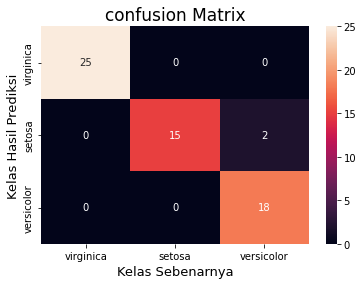

In [15]:
# Menampilkan visualisasi confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=nama_kelas,
            yticklabels=nama_kelas)
plt.ylabel('Kelas Hasil Prediksi', fontsize=13)
plt.xlabel('Kelas Sebenarnya', fontsize=13)
plt.title('confusion Matrix', fontsize=17)
plt.show()

In [16]:
# Menghitung metrik evaluasi untuk klasifikasi data iris 
print(classification_report(y_test, kelas_prediksi))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       1.00      0.88      0.94        17
   virginica       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

